In [29]:
# LSTM 
# importing required libraries
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler 

In [30]:
# loading the dataset
#dataframe = read_csv('dataset_3.csv', usecols=[1], engine='python')
df = pd.read_csv('dataset_3.csv', usecols=[1])
dataset = df.values
dataset = dataset.astype('float32')

In [31]:
# normalizing the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [32]:
# splitting loaded dataset into train and test sets
train_size = int(len(dataset) * 0.67)
#test_size = len(dataset) - train_size
test_size = 0.2
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [33]:
# reshaping into X=t and Y=t+1 to prepare train and test datasets for modelling
look_back = 1
train_data_X, train_data_Y = create_dataset(train, look_back)
test_data_X, test_data_Y = create_dataset(test, look_back)

In [34]:
# reshaping input to be [samples, time steps, features]
train_data_X = numpy.reshape(train_data_X, (train_data_X.shape[0], 1, train_data_X.shape[1]))
test_data_X = numpy.reshape(test_data_X, (test_data_X.shape[0], 1, test_data_X.shape[1]))

In [35]:
print(train_data_X.shape[0])
print(train_data_X.shape[1])

2956
1


In [36]:
# creating and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_data_X, train_data_Y, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
296/296 - 2s - loss: 0.0876
Epoch 2/100
296/296 - 1s - loss: 0.0287
Epoch 3/100
296/296 - 1s - loss: 0.0153
Epoch 4/100
296/296 - 1s - loss: 0.0118
Epoch 5/100
296/296 - 1s - loss: 0.0116
Epoch 6/100
296/296 - 1s - loss: 0.0115
Epoch 7/100
296/296 - 1s - loss: 0.0115
Epoch 8/100
296/296 - 1s - loss: 0.0115
Epoch 9/100
296/296 - 1s - loss: 0.0115
Epoch 10/100
296/296 - 1s - loss: 0.0115
Epoch 11/100
296/296 - 1s - loss: 0.0115
Epoch 12/100
296/296 - 1s - loss: 0.0115
Epoch 13/100
296/296 - 1s - loss: 0.0115
Epoch 14/100
296/296 - 1s - loss: 0.0115
Epoch 15/100
296/296 - 1s - loss: 0.0114
Epoch 16/100
296/296 - 1s - loss: 0.0115
Epoch 17/100
296/296 - 1s - loss: 0.0115
Epoch 18/100
296/296 - 1s - loss: 0.0114
Epoch 19/100
296/296 - 1s - loss: 0.0114
Epoch 20/100
296/296 - 1s - loss: 0.0114
Epoch 21/100
296/296 - 1s - loss: 0.0114
Epoch 22/100
296/296 - 1s - loss: 0.0114
Epoch 23/100
296/296 - 1s - loss: 0.0114
Epoch 24/100
296/296 - 1s - loss: 0.0114
Epoch 25/100
296/296 - 1s

In [37]:
# making predictions
trainPredict = model.predict(train_data_X)
testPredict = model.predict(test_data_X)

In [38]:
# inverting predictions
trainPredict = scaler.inverse_transform(trainPredict)
train_data_Y = scaler.inverse_transform([train_data_Y])
testPredict = scaler.inverse_transform(testPredict)
test_data_Y = scaler.inverse_transform([test_data_Y])

In [39]:
# calculating root mean squared error
trainScore = math.sqrt(mean_squared_error(train_data_Y[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(test_data_Y[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 166.52 RMSE
Test Score: 161.82 RMSE


In [40]:
# shifting train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [41]:
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

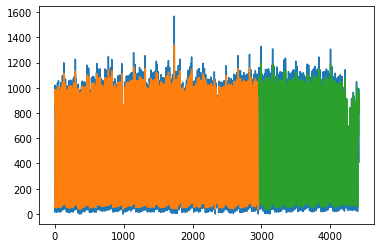

In [42]:
# plotting baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()